In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

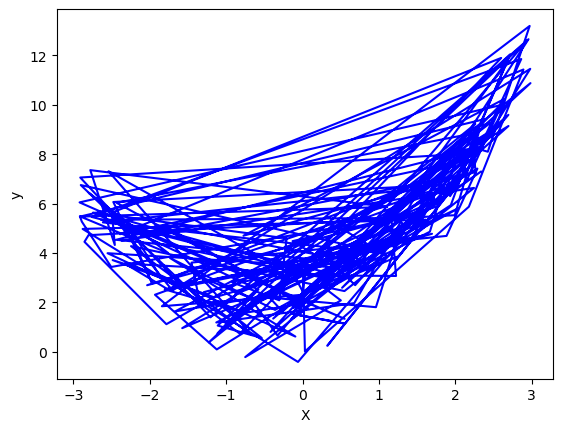

In [12]:
plt.plot(X,y,'b')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred  = lr.predict(X_test)
r2_lr = r2_score(y_test,y_pred)
r2_lr

0.23365190821002946

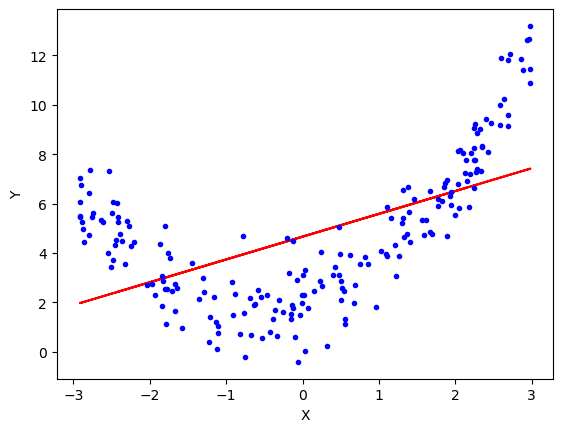

In [13]:
##As you see, r2_lr is very very low ==> the model is not good
plt.plot(X_train, lr.predict(X_train), color = 'r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show() 

In [14]:
#Applying polynomial regression
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [16]:
print(X_train[0])

[-2.43452441]


In [17]:
print(X_train_trans[0])

[ 1.         -2.43452441  5.92690911]


In [18]:
lr2=LinearRegression()
lr2.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred2=lr2.predict(X_test_trans)
r22=r2_score(y_test,y_pred2)
r22

0.9019676097239873

In [21]:
lr2.coef_

array([[0.        , 0.89632555, 0.81106247]])

In [22]:
lr2.intercept_

array([2.02079674])

In [25]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr2.predict(X_new_poly)
y_new

array([[ 6.63138228],
       [ 6.51241962],
       [ 6.39493157],
       [ 6.27891815],
       [ 6.16437935],
       [ 6.05131517],
       [ 5.93972561],
       [ 5.82961068],
       [ 5.72097036],
       [ 5.61380467],
       [ 5.5081136 ],
       [ 5.40389715],
       [ 5.30115533],
       [ 5.19988812],
       [ 5.10009554],
       [ 5.00177758],
       [ 4.90493424],
       [ 4.80956552],
       [ 4.71567142],
       [ 4.62325195],
       [ 4.5323071 ],
       [ 4.44283687],
       [ 4.35484126],
       [ 4.26832027],
       [ 4.18327391],
       [ 4.09970216],
       [ 4.01760504],
       [ 3.93698254],
       [ 3.85783466],
       [ 3.78016141],
       [ 3.70396277],
       [ 3.62923876],
       [ 3.55598937],
       [ 3.4842146 ],
       [ 3.41391445],
       [ 3.34508893],
       [ 3.27773802],
       [ 3.21186174],
       [ 3.14746008],
       [ 3.08453304],
       [ 3.02308063],
       [ 2.96310283],
       [ 2.90459966],
       [ 2.84757111],
       [ 2.79201718],
       [ 2

In [26]:
len(y_new)

200

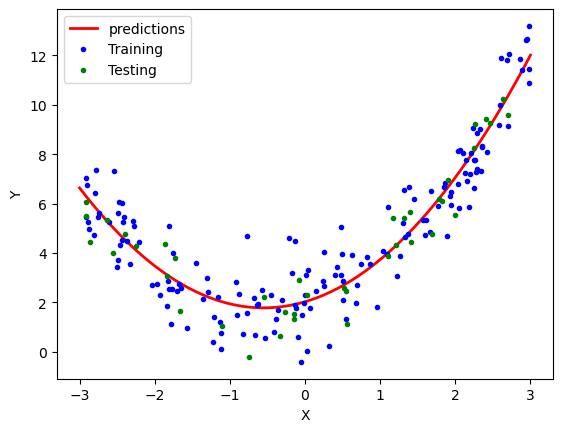

In [28]:
plt.plot(X_new, y_new, 'r-',linewidth=2,label='predictions')
plt.plot(X_train, y_train, 'b.',label='Training')
plt.plot(X_test, y_test, 'g.',label='Testing')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show() 